In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv('heart.csv')

In [3]:
# Prep features and target
X = df.drop(columns=['output'])
y = df['output']

In [4]:
print(X.shape)
print(y.shape)

(303, 13)
(303,)


In [6]:
#print unique values  count of y class labels

unique_values = np.unique(y)
counts = np.zeros_like(unique_values)

for i, value in enumerate(unique_values):
  counts[i] = np.count_nonzero(y == value)

for i, value in enumerate(unique_values):
  print(f"Class label: {value}, Count: {counts[i]}")


Class label: 0, Count: 138
Class label: 1, Count: 165


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.2, random_state=0)

In [9]:
#print shape of train and test data (X,y)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(242, 13)
(61, 13)
(242,)
(61,)


In [10]:
# print count of o and 1 in test data

unique_values = np.unique(y_test)
counts = np.zeros_like(unique_values)

for i, value in enumerate(unique_values):
  counts[i] = np.count_nonzero(y_test == value)

for i, value in enumerate(unique_values):
  print(f"Class label: {value}, Count: {counts[i]}")


Class label: 0, Count: 27
Class label: 1, Count: 34


In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
import sklearn
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_curve,roc_curve, auc, roc_auc_score
from sklearn.metrics import balanced_accuracy_score

In [13]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [14]:
preds = logistic_model.predict(X_test)

Confusion Matrix
[[20  7]
 [ 3 31]]


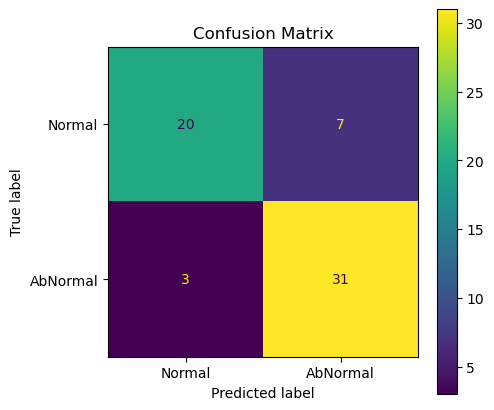

In [17]:
#print confusion matrix
classes = ["Normal","AbNormal"]
cm = confusion_matrix(y_test,preds)

print('Confusion Matrix')
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
fig, ax = plt.subplots(figsize=(5,5))
plt.title("Confusion Matrix")
disp = disp.plot(ax=ax)
plt.show()

In [18]:
Accuracy = metrics.accuracy_score(y_test, preds)
print('Accuracy:', Accuracy*100)

Precision = metrics.precision_score(y_test, preds)
print('Precision:', Precision*100)

Recall = metrics.recall_score(y_test, preds)
print('Recall:', Recall*100)

F1_score = metrics.f1_score(y_test, preds)
print('F1 Score:', F1_score*100)

Accuracy: 83.60655737704919
Precision: 81.57894736842105
Recall: 91.17647058823529
F1 Score: 86.11111111111111


In [20]:
target_names=['Normal', 'Abnormal']
print(classification_report(preds, y_test,target_names=target_names))

              precision    recall  f1-score   support

      Normal       0.74      0.87      0.80        23
    Abnormal       0.91      0.82      0.86        38

    accuracy                           0.84        61
   macro avg       0.83      0.84      0.83        61
weighted avg       0.85      0.84      0.84        61

